In [2]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
data

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,27.32,6.2,90,0
99996,Female,2.0,0,0,17.37,6.5,100,0
99997,Male,66.0,0,0,27.83,5.7,155,0
99998,Female,24.0,0,0,35.42,4.0,100,0


In [5]:
# Remove duplicated data
data = data.drop_duplicates()
data.shape

(91313, 8)

In [6]:
# to Check if there is any missing data
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

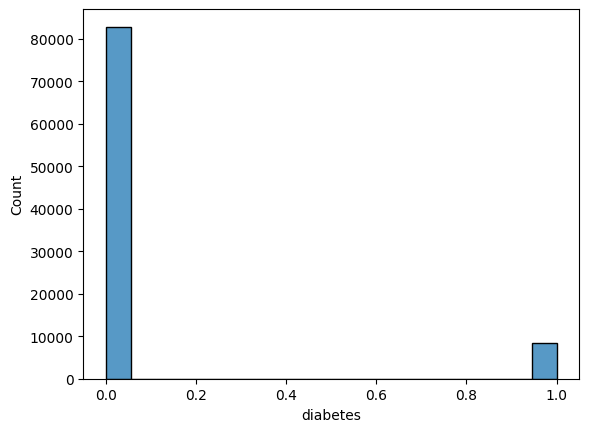

In [7]:
# Check the distribution of the target variable
sns.histplot(data=data, x='diabetes')
plt.show()

C:\Users\alhza\AppData\Local\Temp\ipykernel_14144\3430307990.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


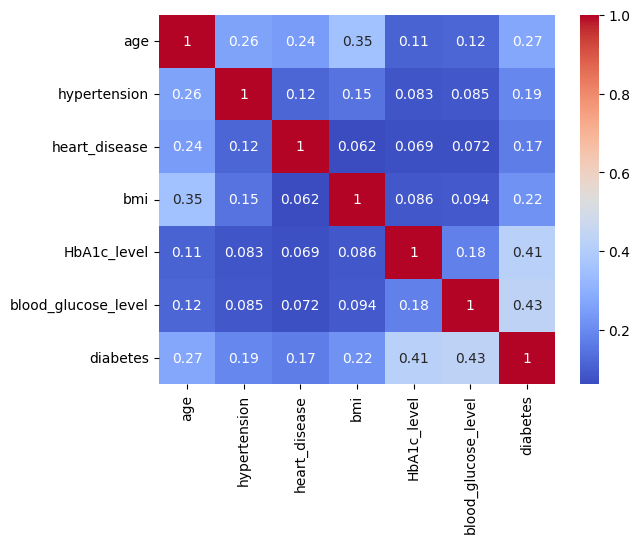

In [8]:
# Check the correlation between features and target variable
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Check the distribution of numerical features
sns.pairplot(data=data, vars=['age', 'hypertension', 'heart_disease','bmi','HbA1c_level','blood_glucose_level'], hue='diabetes')
plt.show()

KeyboardInterrupt: 

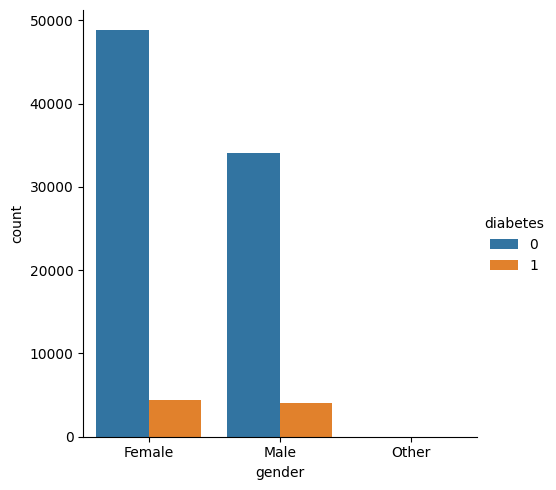

In [10]:
# Check the distribution of categorical features
sns.catplot(data=data, x='gender', kind='count', hue='diabetes')
plt.show()

In [11]:
l1 = LabelEncoder()
l1.fit(data['gender'])
data.gender = l1.transform(data.gender)
data

C:\Users\alhza\AppData\Local\Temp\ipykernel_14144\842480074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.gender = l1.transform(data.gender)


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


### Set features and output 

In [12]:
# Setting the X (features) and Y (label/output/target)
X = data.iloc[:, :-1]  # select all columns except the last one
Y = data.iloc[:, -1]   # select only the last column

### Using Data Preprocessing

In [13]:
# Data Normalization:
mm_scaler = preprocessing.MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)

### Using Hold Out


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_mm, Y, test_size = 0.2, random_state=42, stratify=Y)

### Fit  RandomForestClassifier model

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

### Make predictions for test data

In [16]:
y_pred = rf.predict(X_test)

### Print training and testing accuracy

In [17]:
print('The Training accuracy : {:.3f}'.format(rf.score(X_train , y_train)))
print('The Test accuracy : {:.3f}'.format(rf.score(X_test, y_test)))

The Training accuracy : 0.998
The Test accuracy : 0.966


### Fit LogisticRegression model

In [18]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

### Make predictions for test data


In [19]:
y_lr_pred = lr.predict(X_test)

### Print training and testing accuracy

In [20]:
print('The Training accuracy : {:.3f}'.format(lr.score(X_train, y_train)))
print('The Test accuracy : {:.3f}'.format(lr.score(X_test, y_test)))

The Training accuracy : 0.957
The Test accuracy : 0.958


### Accuracy Score

In [21]:
# accuracy on training data for RandomForestClassifier()
X_train_prediction = rf.predict(X_train)
Training_data_accuracy  = accuracy_score(y_train, X_train_prediction)
print(Training_data_accuracy)
print('Accuracy on Training data :', round(Training_data_accuracy*100, 2), '%')

0.9982067077344284
Accuracy on Training data : 99.82 %


In [22]:
# accuracy on testing data for RandomForestClassifier()
X_test_prediction = rf.predict(X_test)
Testing_data_accuracy  = accuracy_score(y_test, X_test_prediction)
print(Testing_data_accuracy)
print('Accuracy on Testing data :', round(Testing_data_accuracy*100, 2), '%')

0.9664348683129825
Accuracy on Testing data : 96.64 %


In [23]:
# accuracy on training data for LogisticRegression()
X_train_prediction2 = lr.predict(X_train)
Training_data_accuracy2  = accuracy_score(y_train, X_train_prediction2)
print(Training_data_accuracy2)
print('Accuracy on Training data :', round(Training_data_accuracy2*100, 2), '%')

0.9568104038329911
Accuracy on Training data : 95.68 %


In [24]:
# accuracy on testing data for LogisticRegression()
X_test_prediction2 = lr.predict(X_test)
Testing_data_accuracy2  = accuracy_score(y_test, X_test_prediction2)
print(Testing_data_accuracy2)
print('Accuracy on Testing data :', round(Testing_data_accuracy2*100, 2), '%')

0.9578382522039095
Accuracy on Testing data : 95.78 %


### Precision

In [25]:
from sklearn.metrics import precision_score

In [26]:
# precision for training data predictions for RandomForestClassifier()
precision_train = precision_score(y_train, X_train_prediction)
print('Training data Precision =', precision_train)
# precision for test data predictions
precision_test = precision_score(y_test, X_test_prediction)
print('Testing data Precision =', precision_test)

Training data Precision = 0.99789536981359
Testing data Precision = 0.9170542635658915


In [27]:
# precision for training data predictions for LogisticRegression()
precision_train = precision_score(y_train, X_train_prediction2)
print('Training data Precision =', precision_train)
# precision for test data predictions
precision_test = precision_score(y_test, X_test_prediction2)
print('Testing data Precision =', precision_test)

Training data Precision = 0.8691550451189499
Testing data Precision = 0.8769483182936834


### Recall

In [28]:
from sklearn.metrics import recall_score

In [29]:
# recall for training data predictions for RandomForestClassifier()
recall_train = recall_score(y_train, X_train_prediction)
print('Training data Recall =', recall_train)
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction)
print('Testing data Recall =', recall_test)

Training data Recall = 0.982679496669134
Testing data Recall = 0.7004144464179988


In [30]:
# recall for training data predictions for LogisticRegression()
recall_train = recall_score(y_train, X_train_prediction2)
print('Training data Recall =', recall_train)
# recall for test data predictions
recall_test = recall_score(y_test, X_test_prediction2)
print('Testing data Recall =', recall_test)

Training data Recall = 0.6273871206513694
Testing data Recall = 0.6329188869153345


### F1 Score 

In [31]:
from sklearn.metrics import f1_score

In [32]:
# F1 score for training data predictions for RandomForestClassifier()
f1_score_train = f1_score(y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction)
print('Testing data F1 Score =', f1_score_test)

Training data F1 Score = 0.9902289848586558
Testing data F1 Score = 0.7004144464179988


In [33]:
# F1 score for training data predictions for LogisticRegression()
f1_score_train = f1_score(y_train, X_train_prediction2)
print('Training data F1 Score =', f1_score_train)
# F1 Score for test data predictions
f1_score_test = recall_score(y_test, X_test_prediction2)
print('Testing data F1 Score =', f1_score_test)

Training data F1 Score = 0.7287421545868799
Testing data F1 Score = 0.6329188869153345


### Confusion Matrix

In [34]:
# Complete and comprehensive view of metrics 'classification_repor'
from sklearn.metrics import classification_report
cr_rf = classification_report(y_test, y_pred)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16574
           1       0.92      0.70      0.79      1689

    accuracy                           0.97     18263
   macro avg       0.94      0.85      0.89     18263
weighted avg       0.97      0.97      0.96     18263



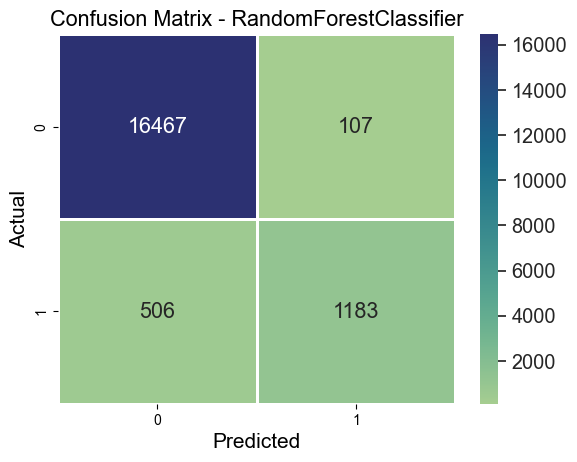

<Figure size 1000x700 with 0 Axes>

In [35]:
#Visualize confusion matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="crest", linewidth=2)

ax.set_title('Confusion Matrix - RandomForestClassifier')
ax.set_xlabel("Predicted", fontsize =15)
ax.set_ylabel("Actual", fontsize=15)
plt.show()

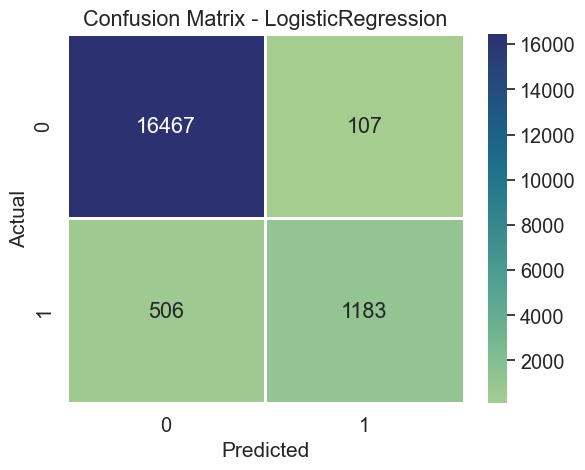

<Figure size 1000x700 with 0 Axes>

In [36]:
#Visualize confusion matrix
from sklearn import metrics

confusion_matrix2 = metrics.confusion_matrix(y_test,  
                                            y_lr_pred)

matrix_df2 = pd.DataFrame(confusion_matrix2)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="crest", linewidth=2)

ax.set_title('Confusion Matrix - LogisticRegression')
ax.set_xlabel("Predicted", fontsize =15)
ax.set_ylabel("Actual", fontsize=15)
plt.show()

In [37]:
rf.fit(data[['gender', 'age', 'blood_glucose_level', 'hypertension','heart_disease','bmi','HbA1c_level']], data.diabetes)

RandomForestClassifier()

In [39]:
import pickle

In [40]:
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [41]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)